In [ ]:
!jupyter nbconvert --to html --template pj --embed-images /content/drive/MyDrive/datascientest_MAI2025/MAI25_CDA_TEMP-TERRESTRE/Pauline/Analyse_donnees.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/datascientest_MAI2025/MAI25_CDA_TEMP-TERRESTRE/Pauline/Analyse_donnees.ipynb to html
[NbConvertApp] Writing 7468225 bytes to /content/drive/MyDrive/datascientest_MAI2025/MAI25_CDA_TEMP-TERRESTRE/Pauline/Analyse_donnees.html


---

title: "Projet Températures - DataScientest"  
formation : "Data analyst - Mai 2025 (continue)"  
author: Pauline Gomont  
date: "2025-11-09"  

---

![https://www.un.org/sites/un2.un.org/files/2020/08/ipcc-5th-assessment.png](https://www.un.org/sites/un2.un.org/files/2020/08/ipcc-5th-assessment.png)


_The Synthesis Report (SYR) of the IPCC Fifth Assessment Report (AR5) provides an overview of the state of knowledge concerning the science of climate change. It shows that human influence on the climate system is clear, and recent anthropogenic emissions of greenhouse gases are the highest in history. Recent climate changes have had widespread impacts on human and natural systems._

#INITIALISATION DU NOTEBOOK

In [ ]:
pip install pretty-jupyter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import des librairies nécessaires à l'étude

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

%matplotlib inline
%load_ext pretty_jupyter

# INTRODUCTION

Le Groupe d'experts intergouvernmental sur l'évolution du climat (GIEC) est aujourd'hui reconnu comme faisant autorité sur le changement climatique. Fondé en 1998, et composé de 195 états membres de l'ONU, le GIEC a pour objectif de faire un état des connaissances scientifiques, techniques et socio-économiques relatives à ce domaine à travers la publication de rapports. Le dernier rapport d'évaluation date de 2023[<sup>1</sup>](#fn1).
L'influence des êtres humains sur le réchauffement de l'atmosphère, des océans et des contients est sans conteste. Le rythme du réchauffement s'est considérement accéléré ces 50 dernières annnées, et il est sans précédent depuis 2000 ans.  
L'émission des gaz à effets de serres est identifiée comme l'un des facteurs ayant le plus de poids dans l'augmentation des températures dont les effets sont intensifiées par la déforestation.


Ce notebook vise à analyser les anomalies des températures observées à la surface de la terre et des océans entre 1880 et 2024, s'appuyant sur les données publiées par le Goddard Institute for Space Studies. Il s'agira d'observer l'évolution des anomalies dans leur distribution sur différentes zones climatiques. Les données de températures seront confrontées par la suite à celles relatives à la consommation mondiale de gaz à effets de serres sur la même période, dans le but d'illustrer des corrélations.

---
<span id="fn1"><sup>1</sup> Rapport de synthèse  AR6 publié par le GIEC - mars 2023 :  
https://www.ipcc.ch/report/ar6/syr/downloads/report/IPCC_AR6_SYR_SPM.pdf (Consulté le 25/10/2025)</span>



---
# JEUX DE DONNÉES

## Anomalies de température : GISTEMP
### Producteur de la source
Fondé en 1960 Goddard Institute for Space Studies (GISS) de la NASA effectue des missions de recherches fondamentales dans le domaine des sciences spatiales.  Les analyses menées sur l’atmosphère terrestre font aujourd’hui de ce laboratoire un acteur majeur de l’étude des changements climatiques.
Le projet GISTEMP (Goddard Institute Surface Temperature Analysis), débuté à la fin des années 1970, consiste à mesurer les températures afin d’en analyser les anomalies, objet principal de ce rapport.
Deux types de relevés de mesures sont mis à disposition sur leur site internet [<sup>2</sup>](#fn2).
- Land-Ocean Temperature Index (L-OTI)
Mesure des anomalies de température (écarts par rapport à une moyenne de référence, généralement 1951–1980) qui combine les températures de l’air en surface au sol et de la mer. Les données couvrent une période allant de 1880 à aujourd’hui et sont actualisées mensuellement.
- Atmospheric Infrared Sounder v6/v7 Temperature (AIRS)
Mesure du rayonnement infrarouge émis par l’atmosphère via un instrument embarqué sur le satellite Aqua et dont les mesures sont converties en données sur les températures. Les données couvrent une période allant de 2002 jusqu’à aujourd’hui et sont actualisées quotidiennement.


Ce rapport cherchant à mettre en évidence les changements de températures sur le temps long, les données AIRS ont été écartées de l’analyse bien que plus précises.

Concernant les températures mesurées à la surface des sols, le GISS utilise les données publiées par le Global Historical Climatology Network qui s'appuient sur les relevés d'environ 7000 stations[<sup>3</sup>](#fn3). Il faut noter une exception pour l’Antarctique, pour lequel les données proviennent du Comité Scientifique des Recherches sur l’Antarctique (SCAR)[<sup>4</sup>](#fn4). La période de référence pour mesurer les anomalies est 1951-1980, période choisie en climatologie par le Service National de Météorologie des Etats-Unis.  
>Le GISS utilise seulement les stations éloignées de 1200km pour lesquelles les données couvrent une période commune d'au moins 20 ans.  
> le GISS retravaille les données brutes, tenant compte par exemple de la luminosité artificielle à laquelle des stations à proximité de milieux urbains peuvent être exposées.

La mesure de la température à la surface des océans quant à elle, se fonde sur les données du Met Office Hadley Center[<sup>5</sup>](#fn5). Les données couvrent la période de 1850 à aujourd’hui puis elles sont insérées dans les zones géographiques définies dans le modèles GISTEMP.


---


<span id="fn2"><sup>2</sup> https://data.giss.nasa.gov/gistemp/ [consulté le 17/09/2025].  
<span id="fn3"><sup>3</sup> https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-monthly  [consulté le 17/09/2025].  
<span id="fn4"><sup>4</sup> http://www.antarctica.ac.uk/met/READER/ [consulté le 17/09/2025].  
<span id="fn5"><sup>5</sup> https://www.ncei.noaa.gov/products/extended-reconstructed-sst [consulté le 17/09/2025].  

---


### Définition des variables
[//]: # (-.- .tabset .tabset-pills)
**Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies**
(Land-Ocean Temperature Index, L-OTI)  
Les fichiers présentent les moyennes d'anomalies de température relevées mensuellement, calculées par années et par saisons, en employant pour période de référence les moyennes mesurées pour la période 1951-1980. Le dernier fichier opére un découpage lattitudinal.

#### Moyennes mensuelles, saisonnières, annuelles

- Global-mean monthly, seasonal, and annual means, 1880-present, updated through most recent month: CSV
- Northern Hemisphere-mean monthly, seasonal, and annual means, 1880-present, updated through most recent month: CSV
- Southern Hemisphere-mean monthly, seasonal, and annual means, 1880-present, updated through most recent month: CSV

|Nom|Type|Variable|Remarque|
|---|---|---|---|
|'Year'| int | qualitative| année au format YYYY : 1880 - 2025 (2024 après traiement)|
|'Jan'| float | quantitative| relevé des anomalies de Janvier en °C p/r à la période de référence|
|'Feb'| float | quantitative|relevé des anomalies de Février en °C p/r à la période de référence|
|'Mar'| float |quantitative|relevé des anomalies de Mars en °C p/r à la période de référence|
|'Apr'| float |quantitative|relevé des anomalies de Avril en °C p/r à la période de référence|
|'May'| float |quantitative|relevé des anomalies de Mai en °C p/r à la période de référence|
|'Jun'| float |quantitative|relevé des anomalies de Juin en °C p/r à la période de référence|
|'Jul'| float |quantitative|relevé des anomalies de Juillet en °C p/r à la période de référence|
|'Aug'| float |quantitative|relevé des anomalies de Août en °C p/r à la période de référence|
|'Sep'| float |quantitative|relevé des anomalies de Septembre en °C p/r à la période de référence|
|'Oct'| float |quantitative|relevé des anomalies de Octobre en °C p/r à la période de référence|
|'Nov'| float |quantitative|relevé des anomalies de Novembre en °C p/r à la période de référence|
|'Dec'| float |quantitative|relevé des anomalies de Décembre en °C p/r à la période de référence|
|'J-D'| float |quantitative|relevé des anomalies de Janvier-Décembre en °C p/r à la période de référence|
|'D-N'| float |quantitative|relevé des anomalies de Décembre-Novembre en °C p/r à la période de référence|
|'DJF'| float |quantitative|relevé des anomalies de Décembre-Février en °C p/r à la période de référence|
|'MAM'| float |quantitative|relevé des anomalies de Mars-Mai en °C p/r à la période de référence|
|'JJA'| float |quantitative|relevé des anomalies de Juin-Août en °C p/r à la période de référence|
|'SON'| float |quantitative|relevé des anomalies de Septembre-Novembre en °C p/r à la période de référence|

#### Moyennes annuelles par zone

- Zonal annual means, 1880-present, updated through most recent complete year: CSV

| Nom     | Type    | Variable     | Remarques                          |Zone|
|:--------|:--------|:-------------|:-----------------------------------|---|
| Year    | int64   | Quantitative | année au format : 1880-2024 |---|
| Glob    | float64 | Quantitative | relevé des anomalies en °C  |monde|
| NHem    | float64 | Quantitative | relevé des anomalies en °C | hémisphère nord |
| SHem    | float64 | Quantitative | relevé des anomalies en °C  |hémisphère sud|
| 24N-90N | float64 | Quantitative | relevé des anomalies en °C | cercle arctique + tropique du Cancer|
| 24S-24N | float64 | Quantitative | relevé des anomalies en °C  | tropiques|
| 90S-24S | float64 | Quantitative | relevé des anomalies en °C  | cercle antarctique + tropique|
| 64N-90N | float64 | Quantitative | relevé des anomalies en °C  | cercle arctique|
| 44N-64N | float64 | Quantitative | relevé des anomalies en °C  | extra tropique du cancer  |
| 24N-44N | float64 | Quantitative | relevé des anomalies en °C  |sub tropique du cancer  |
| EQU-24N | float64 | Quantitative | relevé des anomalies en °C  | Equateur tropique du cancer|
| 24S-EQU | float64 | Quantitative | relevé des anomalies en °C  | tropique du capricorne equateur|
| 44S-24S | float64 | Quantitative | relevé des anomalies en °C  | extra tropique capricorne cercle |
| 64S-44S | float64 | Quantitative | relevé des anomalies en °C  | subtropique capricorne cercle antarctique |
| 90S-64S | float64 | Quantitative | relevé des anomalies en °C  | cercle antarctique|

---
![https://en.wikipedia.org/wiki/Temperate_climate#/media/File:Latitude_zones.png](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Latitude_zones.png/1920px-Latitude_zones.png)


## Émissions de GES : OWID
### Producteur de la source

Our World in Data est une organisation à but non lucratif, basée en Grande-Bretagne, qui met à disposition des jeux de données relatifs à de grands problèmes mondiaux, tels que la pauvreté, les maladies ou encore le changement climatique [<sup>6</sup>](#fn6).  
Elle travaille en partenariat avec les universités d’Oxford et de Harvard pour s’assurer de la validation de la méthodologie employée. L’intégralité des données et du code sont disponibles sur la plateforme Github [<sup>7</sup>](#fn7).
En 2020, Our World in Data publie un jeu de données sur les émissions de gaz à effet de serre sur la planète. Les données sont régulièrement mises à jour, la version utilisée dans ce rapport est celle du 24 novembre 2024. Ce jeu de données est une agrégation de plusieurs producteurs de données comme le Energy Institute, ou encore le Global Carbon Project. Les données recueillies sur les émissions de gaz sont complétées par des métriques concernant le PIB, le nombre d’habitants par pays.

###Définition des données  

Le jeu de données contient près de 80 variables [<sup>8</sup>](#fn8). Seules celles utilisées au cours de l’étude sont détaillées ci-après.  
Les émissions de dioxyde de carbone incluant le changement d’utilisation des sols, notamment dû à la déforestation associée à l’artificialisation des sols, sont retenues pour observer plus finement la part de cette action humaine. Celles de protoxyde d’azote, un gaz à effet de serre extrêmement puissant, même majoritairement naturelles permettent néanmoins de cibler le secteur agricole dont les engrais azotés sont la principale source d’émissions d’origine humaine de ce gaz [<sup>9</sup>](#fn9). Enfin, les émissions de méthane, reconnu comme le deuxième gaz responsable du réchauffement climatique selon le rapport du GIEC de 1993, mettent en exergue la contribution des secteurs énergétique et agricole [<sup>10</sup>](#fn10).


|Nom|Type|Variable|Remarque|
|---|---|---|---|
|co2|float|quantitative|Émissions annuelles de CO₂ en million de tonnes, excluant les changements d'utilisation des sols|
|co2_including_luc|float|quantitative|Émissions annuelles de CO₂ en million de tonnes, incluant les changements d'utilisation des sols|
|methane|float|quantitative|Émissions annuelles de méthane|
|nitrous_oxide|float|quantitative|Emissions annuelles de protoxyde d'azote|
|total_ghg|float|quantitative|Émissions totales de tous les gazs à effet de serre|
|country|object|qualitative|pays, continent|
|year|int|quantitative|année|

---
<span id="fn6"><sup>6</sup> https://ourworldindata.org/about  [consulté le 17/09/2025].  
<span id="fn7"><sup>7</sup> https://github.com/owid [consulté le 17/09/2025].  
<span id="fn8"><sup>8</sup> Le codebook est publié sur le projet github https://github.com/owid/co2-data [consulté le 17/09/2025].  
<span id="fn9"><sup>9</sup> https://fr.wikipedia.org/wiki/Protoxyde_d%27azote [consulté le 16/09/2025].
<span id="fn10"><sup>10</sup> GIEC, « Changements climatiques 2013, Les éléments scientifiques : Résumé à l'intention des décideurs [archive] », 2013, p.12

## Cyclones : IBTrACS
### Producteur de la source
Le projet International Best Track Archive for Climate Stewardship (IBTrACS) a été conçu pour inventorier les cyclones tropicaux signalés dans le monde entier et fournir les données en un seul ensemble mondial. IBTrACS compile et archive les meilleures estimations de la position et de l'intensité des cyclones tropicaux (appelées données best-track) auprès des Centres Météorologiques Spécialisés Régionaux (RSMC) de l'Organisation Météorologique Mondiale (OMM) et d'autres centres d'alerte (TCWC) et organismes nationaux. La première version de ses données en 2008.
La version utilisée dans cette analyse est la v04r01. Les données couvrent une période allant de 1842 à 2025[<sup>10</sup>](#fn10).

### Définition des variables
Le jeu de données contient 174 colonnes dont le détail est fourni [ici](https://www.ncei.noaa.gov/sites/g/files/anmtlf171/files/2025-09/IBTrACS_v04r01_column_documentation.pdf).  Le tableau suivant fait état  uniquement des variables utilisées dans cette analyse.

|Nom      |type   |Variable     | Description                    |
|:------  |:------|:----------- |:------------------------------ |
|SID      |object | Qualitative | Identifiant unique du cyclone  |
|SEASON   |object | Qualitative |Année                           |
|LAT      |object | Qualitative |Latitude                        |
|NATURE   |object | Qualitative |Type de cyclone <br>DS -  Disturbance <br>TS - Tropical <br>ET - Extratropical <br>SS - Subtropical <br>NR - Not reported <br>MX - Mixture (contradicting nature reports from different agencies)|

---
<span id="fn10"><sup>10</sup> https://www.ncei.noaa.gov/products/international-best-track-archive version du 2025-11-06.

---
#IMPORTATION DES DONNEES
[//]: # (-.- .tabset .tabset-pills)

## NASA - Global

In [ ]:
#import
gbl_loti = pd.read_csv('/content/drive/MyDrive/datascientest_MAI2025/MAI25_CDA_TEMP-TERRESTRE/Livrables/Donnees/NASA/Loti/GLB.Ts+dSST.csv', header=1)
print("fichier : GLB.Ts+dSST.csv")
print(f"le dataframe gbl_loti se compose de {gbl_loti.shape[0]} lignes et de {gbl_loti.shape[1]} colonnes")
print('\n')
print(gbl_loti.info())

fichier : GLB.Ts+dSST.csv
le dataframe gbl_loti se compose de 146 lignes et de 19 colonnes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    146 non-null    int64  
 1   Jan     146 non-null    float64
 2   Feb     146 non-null    float64
 3   Mar     146 non-null    float64
 4   Apr     146 non-null    float64
 5   May     146 non-null    float64
 6   Jun     146 non-null    float64
 7   Jul     146 non-null    float64
 8   Aug     146 non-null    object 
 9   Sep     146 non-null    object 
 10  Oct     146 non-null    object 
 11  Nov     146 non-null    object 
 12  Dec     146 non-null    object 
 13  J-D     146 non-null    object 
 14  D-N     146 non-null    object 
 15  DJF     146 non-null    object 
 16  MAM     146 non-null    float64
 17  JJA     146 non-null    object 
 18  SON     146 non-null    object 
dtypes: float64(8), int64

## NASA - Hémisphère Nord


In [ ]:
#import
nh_loti=pd.read_csv('/content/drive/MyDrive/datascientest_MAI2025/MAI25_CDA_TEMP-TERRESTRE/Livrables/Donnees/NASA/Loti/NH.Ts+dSST.csv', header=1)
print("fichier: 'NH.Ts+dSST.csv'")
print(f"le dataframe nh_loti se compose de {nh_loti.shape[0]} lignes et de {nh_loti.shape[1]} colonnes")
print('\n')
print(nh_loti.info())



fichier: 'NH.Ts+dSST.csv'
le dataframe nh_loti se compose de 146 lignes et de 19 colonnes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    146 non-null    int64  
 1   Jan     146 non-null    float64
 2   Feb     146 non-null    float64
 3   Mar     146 non-null    float64
 4   Apr     146 non-null    float64
 5   May     146 non-null    float64
 6   Jun     146 non-null    float64
 7   Jul     146 non-null    object 
 8   Aug     146 non-null    object 
 9   Sep     146 non-null    object 
 10  Oct     146 non-null    object 
 11  Nov     146 non-null    object 
 12  Dec     146 non-null    object 
 13  J-D     146 non-null    object 
 14  D-N     146 non-null    object 
 15  DJF     146 non-null    object 
 16  MAM     146 non-null    float64
 17  JJA     146 non-null    object 
 18  SON     146 non-null    object 
dtypes: float64(7), int64(

## NASA - Hémisphère Sud

In [ ]:
#import
sh_loti=pd.read_csv('/content/drive/MyDrive/datascientest_MAI2025/MAI25_CDA_TEMP-TERRESTRE/Livrables/Donnees/NASA/Loti/SH.Ts+dSST.csv', header=1)
print("fichier: 'SH.Ts+dSST.csv'")
print(f"le dataframe sh_loti se compose de {sh_loti.shape[0]} lignes et de {sh_loti.shape[1]} colonnes")
print('\n')
print(sh_loti.info())

fichier: 'SH.Ts+dSST.csv'
le dataframe sh_loti se compose de 146 lignes et de 19 colonnes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    146 non-null    int64  
 1   Jan     146 non-null    float64
 2   Feb     146 non-null    float64
 3   Mar     146 non-null    float64
 4   Apr     146 non-null    float64
 5   May     146 non-null    float64
 6   Jun     146 non-null    float64
 7   Jul     146 non-null    object 
 8   Aug     146 non-null    object 
 9   Sep     146 non-null    object 
 10  Oct     146 non-null    object 
 11  Nov     146 non-null    object 
 12  Dec     146 non-null    object 
 13  J-D     146 non-null    object 
 14  D-N     146 non-null    object 
 15  DJF     146 non-null    object 
 16  MAM     146 non-null    float64
 17  JJA     146 non-null    object 
 18  SON     146 non-null    object 
dtypes: float64(7), int64(

## NASA - Zones

In [ ]:
#import
za_loti=pd.read_csv('/content/drive/MyDrive/datascientest_MAI2025/MAI25_CDA_TEMP-TERRESTRE/Livrables/Donnees/NASA/Loti/ZonAnn.Ts+dSST.csv')
print("fichier: 'ZonAnn.Ts+dSST.csv'")
print(f"le dataframe za_loti se compose de {za_loti.shape[0]} lignes et de {za_loti.shape[1]} colonnes")
print('\n')
print(za_loti.info())

fichier: 'ZonAnn.Ts+dSST.csv'
le dataframe za_loti se compose de 145 lignes et de 15 colonnes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     145 non-null    int64  
 1   Glob     145 non-null    float64
 2   NHem     145 non-null    float64
 3   SHem     145 non-null    float64
 4   24N-90N  145 non-null    float64
 5   24S-24N  145 non-null    float64
 6   90S-24S  145 non-null    float64
 7   64N-90N  145 non-null    float64
 8   44N-64N  145 non-null    float64
 9   24N-44N  145 non-null    float64
 10  EQU-24N  145 non-null    float64
 11  24S-EQU  145 non-null    float64
 12  44S-24S  145 non-null    float64
 13  64S-44S  145 non-null    float64
 14  90S-64S  145 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 17.1 KB
None


## OWID

In [ ]:
#import
owid_co2=pd.read_csv('/content/drive/MyDrive/datascientest_MAI2025/MAI25_CDA_TEMP-TERRESTRE/Livrables/Donnees/GitHub/owid-co2-data.csv')

#shape
print("fichier:'owid-co2-data.csv'")
print(f"le dataframe owid_co2 se compose de {owid_co2.shape[0]} lignes et de {owid_co2.shape[1]} colonnes")
print('\n')
print(owid_co2.info())

fichier:'owid-co2-data.csv'
le dataframe owid_co2 se compose de 50191 lignes et de 79 colonnes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50191 entries, 0 to 50190
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50191 non-null  object 
 1   year                                       50191 non-null  int64  
 2   iso_code                                   42262 non-null  object 
 3   population                                 41019 non-null  float64
 4   gdp                                        15251 non-null  float64
 5   cement_co2                                 28863 non-null  float64
 6   cement_co2_per_capita                      25358 non-null  float64
 7   co2                                        29137 non-null  float64
 8   co2_growth_abs                             26981 non-null  float64
 9

## Cyclones

In [ ]:
gbl_cy=pd.read_csv('/content/drive/MyDrive/datascientest_MAI2025/MAI25_CDA_TEMP-TERRESTRE/Livrables/Donnees/IBTrACS/ibtracs.ALL.list.v04r01.csv',low_memory=False)
#shape
print('fichier: ibtracs.ALL.list.v04r01.csv')
print(f"le dataframe gbl_cy se compose de {gbl_cy.shape[0]} lignes et de {gbl_cy.shape[1]} colonnes")
print('\n')
print(gbl_cy.info())

fichier: ibtracs.ALL.list.v04r01.csv
le dataframe gbl_cy se compose de 721938 lignes et de 174 colonnes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721938 entries, 0 to 721937
Columns: 174 entries, SID to STORM_DIR
dtypes: int64(1), object(173)
memory usage: 958.4+ MB
None


---
# PROCESSING

## GISTEMP

###Harmonisation des formats
Dans les datasets du GISTEMP, global, hémisphères nord et sud, en cas d'absence de valeurs, les données sont figurées par la chaîne de caractères suivante :  "***".   
La présence de cette chaîne de caractères impacte le type de données, en effet les variables concernées sont considérées comme `object` et non comme `float`. De plus, elles ne sont pas reconnues comme NULL. Aussi, la première étape a été de convertir les variables `object` en `float64`  pour faciliter les calculs et les analyses, à l’aide de la méthode to_numeric de pandas afin. L'appel à cette méthode permet dans un même temps de traiter les chaînes de caractères problématiques. En effet, les erreurs, des données qui ne sont pas reconnues comme des float sont converties en NaN.
le dataframe Zone annual comporte déjà uniquement des float, pas besoin de convertir le type de données
Pour éviter de répéter la même séquence de code, il est possible de définir des fonctions.

In [ ]:
#Compter et localiser les occurrences de '***' dans chaque colonne**
def sum_of_empty_values (df,name):
  occurrences = (df =='***').sum()
  print('Avant conversion, le dataframe',name,'contient', occurrences.sum(), 'valeurs non exploitables ("***")')


def empty_values (df):
    df_empty=df.loc[(df =='***').any(axis=1)]
    print('Lignes concernées')
    print(df_empty)
    return df_empty


#Conversion des object en float
def object_to_float(df):
  for col in df.select_dtypes(include=['object']).columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
  print('Après conversion, le dataframe contient', (df.isna().sum()).sum(), 'Nan')
  return df

#Combinaison pour enchaîner les opérations
def all_processing(df,name):
    print("DATAFRAME:",name)
    print('\n')
    sum_of_empty_values(df, name)
    df_empty=empty_values(df)
    print('\n')
    object_to_float(df)
    print('\n')
    df.info()



Pour éviter les saisies répétitives, les dataframes concernés sont réunies dans une liste, ainsi les traitements peuvent être appliqués en seule fois à l'aide d'une boucle for
list_of_df={'gbl_loti':gbl_loti, 'nh_loti':nh_loti,'sh_loti':sh_loti}



In [ ]:
list_of_df={'gbl_loti':gbl_loti, 'nh_loti':nh_loti,'sh_loti':sh_loti}


for name,df in list_of_df.items():
  print('='*40)
  all_processing(df,name)
  print('\n'*2)


DATAFRAME: gbl_loti


Avant conversion, le dataframe gbl_loti contient 11 valeurs non exploitables ("***")
Lignes concernées
     Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0    1880 -0.18 -0.24 -0.09 -0.16 -0.10 -0.21 -0.18  -.10  -.14  -.23  -.22   
145  2025  1.37  1.26  1.36  1.23  1.07  1.04  1.03   ***   ***   ***   ***   

      Dec   J-D  D-N   DJF   MAM   JJA   SON  
0    -.17  -.17  ***   *** -0.12  -.16  -.20  
145   ***   ***  ***  1.30  1.22   ***   ***  


Après conversion, le dataframe contient 11 Nan


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    146 non-null    int64  
 1   Jan     146 non-null    float64
 2   Feb     146 non-null    float64
 3   Mar     146 non-null    float64
 4   Apr     146 non-null    float64
 5   May     146 non-null    float64
 6   Jun     146 non-null    float64
 7   Ju

Le dataframe des zones annuelles considère une colonne par zone, elles sont transposées en une seule et unique colonne zone. Parailleurs, le global, les hémisphère Nord et Sud étant abordés dans les autres fichiers, ces colonnes sont supprimées du dataframe. Il en est de même pour les zones qui se recoupent


In [ ]:
za_loti_zonly=za_loti[['Year','64N-90N', '44N-64N', '24N-44N', 'EQU-24N', '24S-EQU', '44S-24S',
       '64S-44S', '90S-64S']]

In [ ]:
za_loti_reversed = za_loti_zonly.melt(
    id_vars=['Year'],
    var_name='zone',
    value_name='temperature_anomaly',
    ignore_index=True
).rename(columns={'Year': 'year'})

za_loti_reversed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160 entries, 0 to 1159
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 1160 non-null   int64  
 1   zone                 1160 non-null   object 
 2   temperature_anomaly  1160 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 27.3+ KB


In [ ]:
za_loti_reversed.to_csv('/content/drive/MyDrive/out.csv', index=False)

In [ ]:
za_loti_reversed['temperature_anomaly'].max()

3.24



---



### Traitement des NaN
Les NaN représentent un pourcentage très faible de données et concernent les mois manquant de l’année en cours, ainsi que les moyennes basées sur l’année précédant la période de référence. Le but de l’analyse étant de modéliser la tendance que suit le réchauffement climatique, la suppression de ces données ne l’impacte pas. Aussi, il a été décidé de supprimer les lignes correspondantes des différents dataframes.

In [ ]:
gbl_loti=gbl_loti.dropna(axis=0,how='any')
nh_loti=nh_loti.dropna(axis=0,how='any')
sh_loti=sh_loti.dropna(axis=0,how='any')

print('Après suppression')
print('Gobal:',(gbl_loti.isna().sum()).sum(), 'Nan')
print('Hémistphère nord:',(nh_loti.isna().sum()).sum(), 'Nan')
print('Hémisphère Sud:',(sh_loti.isna().sum()).sum(), 'Nan')
print('-'*3)
print('Zones géographiques:',(za_loti.isna().sum()).sum(), 'Nan')

Après suppression
Gobal: 0 Nan
Hémistphère nord: 0 Nan
Hémisphère Sud: 0 Nan
---
Zones géographiques: 0 Nan




## OWID

Pour avoir des échantillons comparables, il est nécessaire d'opérer quelques transformations du dataset:
- la suppression des variables non utilisées,
- la suppression des années non comprises dans les données de la NASA soit avant 1850.
- filtrer sur les continents, pour reconstituer plus facilement les hémisphères
- joindre les dataframes des emissions de gaz à effet et de serre et des anomalies de température




### Filtrage des données
La colonne nommée country contient réalité plus que des pays, on observe la présence de zone économique comme l'Union Européenne, mais également les continents.
Seules les lignes concernant les continents sont retenues pour reconstituer les hémisphères.

In [ ]:
#Création d'un nouveau datafame contenant les colonnes pertinentes pour l'étude et renommage de la colonne country
owid_co2_filter=owid_co2[['country','year','co2','co2_including_luc', 'methane','nitrous_oxide','total_ghg','population']].rename(columns={'country':'continent'})

#Une liste des noms de continents est consituée pour pouvoir facilement filter les données d'émissions de gaz à effets de serre
#Les dates non étudiées par les données du GISTEMP sont inclues dans ce même filte
continent=['Africa','Asia','Europe','North America','Oceania','South America']
owid_co2_study=owid_co2_filter[(owid_co2_filter['year']>=1880)&(owid_co2_filter['year']<=2024)&owid_co2_filter['continent'].isin(continent)].reset_index(drop=True)
print("Dataframe après suppression des variables non pertinentes et filtrage sur les dates")
print('\n')
print(owid_co2_study.info())

Dataframe après suppression des variables non pertinentes et filtrage sur les dates


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   continent          864 non-null    object 
 1   year               864 non-null    int64  
 2   co2                860 non-null    float64
 3   co2_including_luc  860 non-null    float64
 4   methane            864 non-null    float64
 5   nitrous_oxide      864 non-null    float64
 6   total_ghg          864 non-null    float64
 7   population         864 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 54.1+ KB
None


### Traitement des Nan
Les nulls sont supprimés du jeu de données, en raison de leur faible nombre et du fait qu'ils ne concernent qu'un seul continent pour les quatre premières années ne compromet pas l'analyse

In [ ]:
print("Lignes contenant des valeurs nulles")
print(owid_co2_study[owid_co2_study.isna().any(axis=1)])

Lignes contenant des valeurs nulles
  continent  year  co2  co2_including_luc  methane  nitrous_oxide  total_ghg  \
0    Africa  1880  NaN                NaN   88.414         19.343    219.247   
1    Africa  1881  NaN                NaN   89.115         19.563    225.336   
2    Africa  1882  NaN                NaN   89.819         19.750    257.469   
3    Africa  1883  NaN                NaN   90.527         19.910    244.002   

    population  
0  128194527.0  
1  128863890.0  
2  129548955.0  
3  130249836.0  


In [ ]:
#Suppression des lignes contenant des NaN
owid_co2_clean=owid_co2_study.dropna(axis=0,how='any').reset_index(drop=True)

#Résultat du dataframe nettoyé
print("Dataframe nettoyé")
owid_co2_clean.info()

Dataframe nettoyé
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   continent          860 non-null    object 
 1   year               860 non-null    int64  
 2   co2                860 non-null    float64
 3   co2_including_luc  860 non-null    float64
 4   methane            860 non-null    float64
 5   nitrous_oxide      860 non-null    float64
 6   total_ghg          860 non-null    float64
 7   population         860 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 53.9+ KB


### Attribution d'un hémisphère pour chaque contient
Il faut désormais attribuer un hémisphère au continent 'NHem', 'SHem', on peut ajouter une nouvelle colonne en faisant des correspondances. Pour cela un dictionnaire de mappping associé à la méthode map d'associer le bon continent au bon hémisphère. La notation `Shem`et `Nhem`employée dans les données GISTEMP sont appliquées pour faciliter les rapprochements futurs.

In [ ]:
hemisphere_dict= {
    'Africa': 'SHem',
    'Oceania': 'SHem',
    'South America': 'SHem',
    'Asia': 'NHem',
    'Europe': 'NHem',
    'North America': 'NHem'
}


owid_co2_clean['hemisphere'] = owid_co2_clean['continent'].map(hemisphere_dict)
print("Dataframe après attribution d'un hémisphère pour chaque continent, exécutée grâce à la méthode `.map()`")
print("\n")
print(owid_co2_clean.info())


Dataframe après attribution d'un hémisphère pour chaque continent, exécutée grâce à la méthode `.map()`


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   continent          860 non-null    object 
 1   year               860 non-null    int64  
 2   co2                860 non-null    float64
 3   co2_including_luc  860 non-null    float64
 4   methane            860 non-null    float64
 5   nitrous_oxide      860 non-null    float64
 6   total_ghg          860 non-null    float64
 7   population         860 non-null    float64
 8   hemisphere         860 non-null    object 
dtypes: float64(6), int64(1), object(2)
memory usage: 60.6+ KB
None


In [ ]:
print('les moyennes annuelles par hémisphère permettront de les confronter aux anomalies de températures relevées dans ces deux zones géographiques')
co2_annual_mean= owid_co2_clean.groupby(['year', 'hemisphere'])[['co2', 'co2_including_luc','methane','nitrous_oxide','total_ghg','population']].mean()
print(co2_annual_mean.head())


les moyennes annuelles par hémisphère permettront de les confronter aux anomalies de températures relevées dans ces deux zones géographiques
                        co2  co2_including_luc     methane  nitrous_oxide  \
year hemisphere                                                             
1880 NHem        283.842667        1362.452667  458.787667      67.737000   
     SHem          3.263000         150.229500   39.689000      12.566500   
1881 NHem        293.524333        1339.009333  463.723000      68.478333   
     SHem          3.696500         162.643000   40.736500      12.711000   
1882 NHem        309.926000        1391.886667  468.713000      69.118333   

                   total_ghg    population  
year hemisphere                             
1880 NHem        1794.656000  4.188681e+08  
     SHem         212.389000  1.600544e+07  
1881 NHem        1799.069333  4.215456e+08  
     SHem         226.157500  1.630267e+07  
1882 NHem        1865.705333  4.244031e+08  


## Cyclones

### Nettoyage et harmonisation des formats
Les données IBTrACS contiennent un grand nombre de variables qui ne sont pas pertinentes pour cette étude, aussi elles sont supprimées du dataframe. La colonne `SEASON`est renommée en `year`, un nom plus explicite, pour faciliter les rapprochements avec les données du GISTEMP.
La deuxième ligne du fichier contient l'unité employée pour certaine colonne, elle est suprimée, car inutile dans le contexte de l'étude et génère du bruit pour le type de données.
La colonne `LAT` est convertie en float pour faciliter les manipulations. Le fichier suit le parcours d'un cyclone, or dans le cadre de cette étude, cherchant à mettre en relation les anomalies de température et la fréquence des cyclones, cette information n'est pas utile. En revanche, la lattitude moyenne du cyclone est retenue afin d'en connaître une localisation approximative dans le but de le situer dans l'une des zones climatiques définies dans les données du GISTEMP.

In [ ]:
#Suppression des variables et de la deuxième ligne
cy_filtered=gbl_cy[['SID','SEASON','LAT','ISO_TIME','NATURE']].copy()
cy_filtered = cy_filtered.rename(columns={'SEASON': 'year'})

cy_filtered = cy_filtered.drop(index=0).reset_index(drop=True)
print('Après suppression des variables et de la deuxième ligne')
print('\n')
print(cy_filtered.head(3))
cy_filtered.info()

Après suppression des variables et de la deuxième ligne


             SID  year   LAT             ISO_TIME NATURE
0  1842298N11080  1842  10.9  1842-10-25 03:00:00     NR
1  1842298N11080  1842  10.9  1842-10-25 06:00:00     NR
2  1842298N11080  1842  10.8  1842-10-25 09:00:00     NR
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721937 entries, 0 to 721936
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   SID       721937 non-null  object
 1   year      721937 non-null  object
 2   LAT       721937 non-null  object
 3   ISO_TIME  721937 non-null  object
 4   NATURE    721937 non-null  object
dtypes: object(5)
memory usage: 27.5+ MB


In [ ]:
#Modification des types de la colonne LAT
cy_filtered['LAT']=cy_filtered['LAT'].astype('float')
cy_filtered['year']=cy_filtered['year'].astype('int')
print('Dataframe après conversion des colonnes `LAT` et `year`')
print('\n')
print(cy_filtered.info())

Dataframe après conversion des colonnes `LAT` et `year`


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721937 entries, 0 to 721936
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   SID       721937 non-null  object 
 1   year      721937 non-null  int64  
 2   LAT       721937 non-null  float64
 3   ISO_TIME  721937 non-null  object 
 4   NATURE    721937 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 27.5+ MB
None


### Regroupement et filtrage des données
La trajectoire des cyclones dans le cadre de cette analyse n'est pas prise en compte à la faveur de la fréquence. Aussi seule la première latitude enregistrée par cyclone est retenue. L'évolution des cyclones étant enregistrée de manière chronologique, la variable `start_LAT` est donc crée est sera considérée comme le point le plus proche de la source du cyclone.

In [ ]:
#Regroupement selon la lattitude moyenne
cy_grp=cy_filtered.groupby(['SID','year','NATURE'])['LAT'].first().rename('start_LAT').reset_index()
cy_study=cy_grp[(cy_grp['year']>=1880)&(cy_grp['year']<=2024)].reset_index(drop=True)

print('Dataframe après filtrage')
print('\n')
print(cy_study.head())
print('\n')
print('='*60)
print('\n')
print(cy_study.info())

Dataframe après filtrage


             SID  year NATURE  start_LAT
0  1879344S16059  1880     TS      -16.4
1  1879345S15060  1880     NR      -15.3
2  1879345S16054  1880     TS      -15.9
3  1879345S16059  1880     NR      -15.7
4  1879355S15054  1880     NR      -15.2




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21959 entries, 0 to 21958
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SID        21959 non-null  object 
 1   year       21959 non-null  int64  
 2   NATURE     21959 non-null  object 
 3   start_LAT  21959 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 686.3+ KB
None


### Attribution d'une zone climatique
Les lattitudes moyennes obtenues sont rapprochées des zones climatiques déclarées dans les données GISTEMP afin de pouvoir mesurer les corrélations entre les deux phénomènes à l'échelle planétaire mais également sur des zones plus réduites. Pour cela, la méthode `.cut()`est employée pour situer une lattitude dans un intervalle défini.

In [ ]:
#Création des intervalles de lattitudes
bins=[-90,-64,-44,-24,0,24,44,64,90]
labels=['90S-64S','64S-44S','44S-24S','24S-EQU','EQU-24N','24N-44N','44N-64N','64N-90N']

cy_study['zone'] = pd.cut(
    cy_study['start_LAT'],
    bins=bins,
    labels=labels,
    right=False
)
cy_study['zone']=cy_study['zone'].astype('object')

#Attribution d'un hémisphère
bins=[-90,0,90]
labels=['SHem','NHem']

cy_study['hemisphere'] = pd.cut(
    cy_study['start_LAT'],
    bins=bins,
    labels=labels,
    right=False
)
cy_study['hemisphere']=cy_study['hemisphere'].astype('object')

print('Dataframe final')
print('\n')
separator = pd.DataFrame([['...'] * len(cy_study.columns)], columns=cy_study.columns)
print(pd.concat([cy_study.head(3), separator, cy_study.tail(3)], ignore_index=False))
print('\n')
print('='*60)
print('\n')
print(cy_study.info())

Dataframe final


                 SID  year NATURE start_LAT     zone hemisphere
0      1879344S16059  1880     TS     -16.4  24S-EQU       SHem
1      1879345S15060  1880     NR     -15.3  24S-EQU       SHem
2      1879345S16054  1880     TS     -15.9  24S-EQU       SHem
0                ...   ...    ...       ...      ...        ...
21956  2024356N14084  2024     TS      13.7  EQU-24N       NHem
21957  2024357N10115  2024     MX      10.3  EQU-24N       NHem
21958  2024357N10115  2024     TS      10.1  EQU-24N       NHem




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21959 entries, 0 to 21958
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SID         21959 non-null  object 
 1   year        21959 non-null  int64  
 2   NATURE      21959 non-null  object 
 3   start_LAT   21959 non-null  float64
 4   zone        21959 non-null  object 
 5   hemisphere  21959 non-null  object 
dtypes: float64(1), int64(1), 

---
# DISTRIBUTION VARIABLES

## Anomalies de températures
[//]: # (-.- .tabset .tabset-pills)

Les moyennes annuelles au global et pour chaque hémisphère suivent une distribution asymétrique, les anomalies négatives sont plus nombreuses. Cela signifie qu’au global, sans notion de temporalité, l’on constate un nombre plus important d'années “froides” , entre 0 et -0,5°C, que d’années “chaudes”, par rapport à la période de référence.
On constate également que les anomalies positives présentent un écart plus important à la période de référence, jusqu'à +1,5°C quasiment trois fois plus important que celui des anomalies négatives.
La comparaison des deux hémisphères révèlent que le nord est exposé à une plus importante variation des anomalies.


Les boxplots révèlent la présence de valeurs aberrantes supérieures à des anomalies de +1°C qui concernent toutes l'hémisphère nord. Au global, la médiane se situe aux alentours de 0°C. Les deuxième et troisième quartiles confirment l’intervalle plus important concernés par les anomalies positives.
L’intégralité des valeurs aberrantes se retrouvent au niveau de l’hémisphère nord, et elles concernent des anomalies positives. Leur présence contrebalance l’équilibre observé entre les premier et deuxième quartile. Cela peut suggérer des périodes particulièrement chaudes dans cette zone de la planète.
Les moustaches, indiquant les valeurs minimales et maximales, confirment que le nord est exposé à des variations plus importantes que le sud.   


Les courbes montrent une augmentation continue du réchauffement des températures relevées à la surface des sols. Les valeurs identifiées comme aberrantes dans les boxplots concernent l’année 2024, ce qui suggérerait une accélération plus marquée.
Dans l’hémisphère nord, l’augmentation est plus importante à partir des années 1950 et s’intensifie encore à partir de 1975. A l’inverse, dans l’hémisphère sud, on constate comme un plateau jusqu’au début des années 1930, suivi de quelques années particulièrement chaudes. Par la suite, la courbe suit une trajectoire plutôt linéaire.

<br>

Les trois types de graphiques tendent à démontrer une augmentation globale des températures relevées au sol. Cependant il faut souligner une évolution différente entre les deux hémisphères. Celui du nord connait un réchauffement plus important et sur une période plus longue par rapport à celui du sud.
L'évolution des anomalies de températures relevées sur les différentes zones climatiques permet d'affiner l'analyse.

La majeure partie des zones climatiques suivent une trajectoire similaire. L'augmentation des températures est constante, depuis la fin des années 1910.
Les cercles articque et antarticque sont les zones qui connaissent les plus grandes variations de température. Il faut souligner pour le premier, qu'il est la zone qui s'est le plus réchauffée et l'augmentation des témpératures s'est considérablement accrue depuis la fin des années 1990. Il affiche aujourd'hui une moyenne supérieure à +2,5°C par rapport à la période de référence. Cela se traduit par une accélaration de la fonte des glaces et donc une montée des eaux.


### Moyennes annuelles J-D

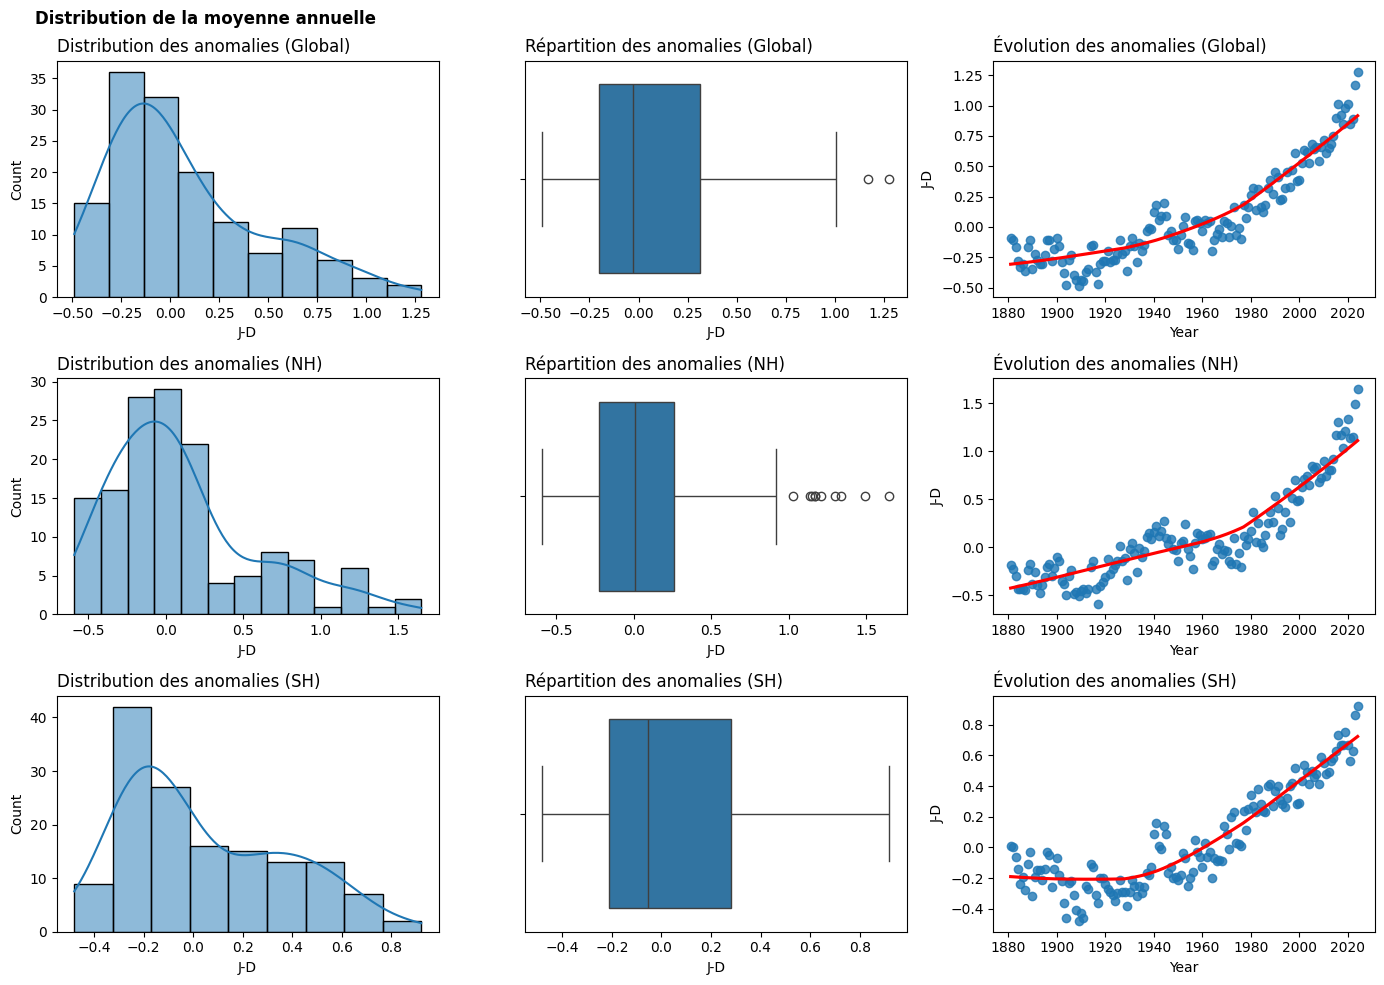

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(14, 10))

plt.suptitle('Distribution de la moyenne annuelle',fontweight='bold',x=0.15)
# Echelle du monde
sns.histplot(gbl_loti['J-D'], kde=True,ax=axes[0, 0])
axes[0, 0].set_title('Distribution des anomalies (Global)', loc='left')

sns.boxplot(x=gbl_loti['J-D'], ax=axes[0,1])
axes[0, 1].set_title('Répartition des anomalies (Global)', loc='left')

sns.regplot(x='Year', y='J-D', data=gbl_loti,
            lowess=True, line_kws={'color': 'red'}, ax=axes[0, 2])
axes[0, 2].set_title('Évolution des anomalies (Global)', loc='left')

# Hémisphère nord
sns.histplot(nh_loti['J-D'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution des anomalies (NH)', loc='left')

sns.boxplot(x=nh_loti['J-D'], ax=axes[1,1])
axes[1, 1].set_title('Répartition des anomalies (NH)', loc='left')

sns.regplot(x='Year', y='J-D', data=nh_loti,
            lowess=True, line_kws={'color': 'red'}, ax=axes[1,2])
axes[1, 2].set_title('Évolution des anomalies (NH)', loc='left')

# Hémisphère sud
sns.histplot(sh_loti['J-D'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution des anomalies (SH)', loc='left')

sns.boxplot(x=sh_loti['J-D'], ax=axes[2,1])
axes[2, 1].set_title('Répartition des anomalies (SH)', loc='left')

sns.regplot(x='Year', y='J-D', data=sh_loti,
            lowess=True, line_kws={'color': 'red'}, ax=axes[2, 2])
axes[2, 2].set_title('Évolution des anomalies (SH)', loc='left')

plt.tight_layout()
plt.show()




### Moyennes annuelles par zone climatique

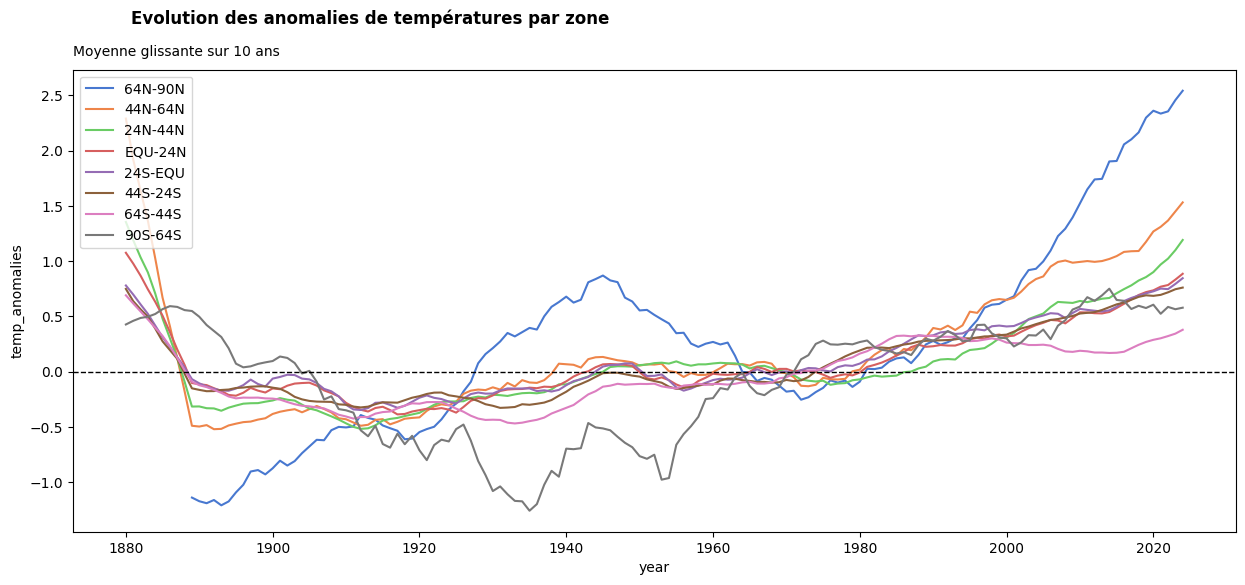

In [ ]:
#Pour rendre le graphique plus lisible, une moyenne glissante sur 10 années est utilisée
window=10
za_loti_reversed['temp_anomalies'] = za_loti_reversed['temperature_anomaly'].rolling(window).mean()
plt.figure(figsize=(15, 6))
sns.lineplot(data=za_loti_reversed, x='year', y='temp_anomalies', hue='zone', palette='muted')

plt.suptitle('Evolution des anomalies de températures par zone', fontweight='bold',x=0.323)
plt.title('Moyenne glissante sur 10 ans',loc='left',pad=10, fontsize=10)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.legend(loc='upper left')
plt.show();


## Cyclones
[//]: # (-.- .tabset .tabset-pills)

Il est à noter que la précision avec laquelle les cyclones sont pistés s'est considérablement améloriée avec l'apport de la surveillance sattelitaire à partir des années 1960. La période après 1979 est considérée comme le début de l'ère moderne de la surveillance où la couverture est quasi globale.
Auparavant la qualité et la complétude des données sont inégales. Cela a pour effet d'augmenter artificiellement le nombre de cyclones, car un même phénomène a pu être comptabilisé en plusieurs évènements.  

La distribution par nature de cyclone révèle la prédominance des systèmes tropicaux (TS) ce qui peut trouver une explication dans la nature même du jeu de données, car le projet IBTrACS est l'archive mondiale pour les cyclones tropicaux. Les natures NR (non renseignée) et MX (mixte) sont difficilement exploitables car ne définissent pas les cyclones mais trahissent seulement l'impossibilité de définir le cyclone. Pour cette dernière, le boxplot fait apparaitre une concentration plus forte pour les périodes les plus récentes en raison notamment, de la mutltiplication des sources primaires utilisées qui chacune emploie une taxonomie difficilement réconciliable.

La part plus faible des disturbances (DS) et des systèmes subtropicaux (SS) trouvent également une explication dans les données, car ils n'ont pas toujours étaient inclus dans le périmètre de surveillance. Cela est illustré en partie par les valeurs qui pourraient être considérées comme abérrantes.

Malgré la potentielle imprécision des données pour les années les plus anciennes, l'augementation du nombre de cyclones par an est nettement observable notamment à partir des années 1950. On observe égalemnet un premier pic au cours des années 1970 et un second au début des années 2020.


Étant donné que les cyclones tropicaux sont les plus nombreux, il est normal que la bande latitudinale entre l'équateur et le tropique du Cancer soit la zone comptant le plus de cyclones. Plus l'on s'éloigne de l'équateur, plus le nombre de cyclones diminue, en raison d'une présence plus prononcée des eaux froides.

### Distribution

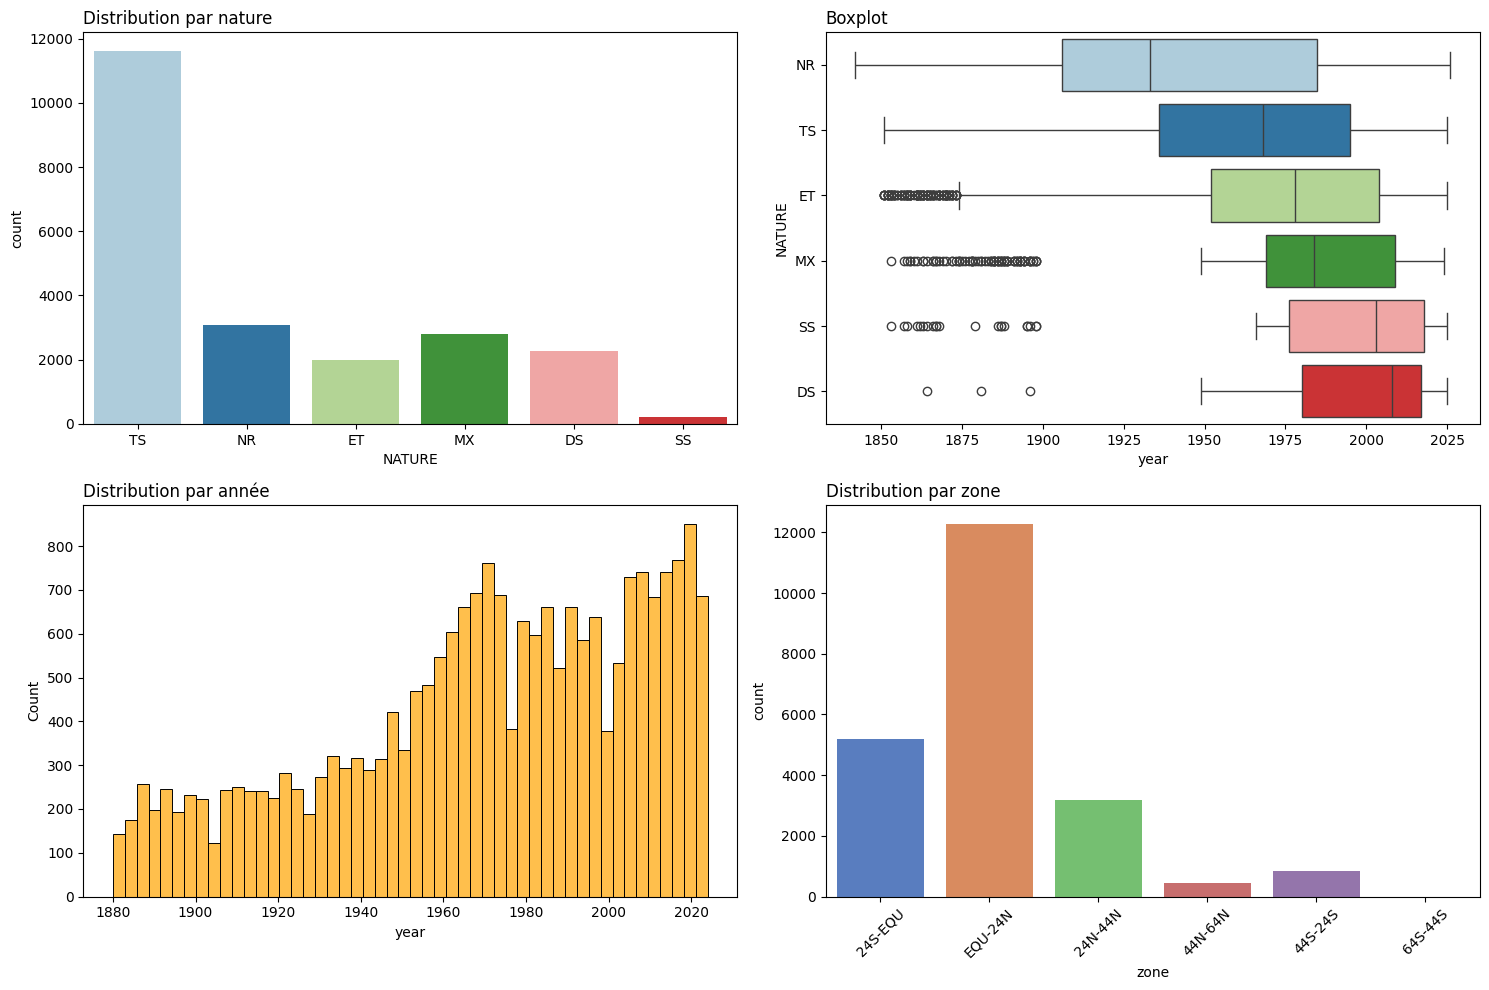

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(15, 10))

#Répartition par type
sns.countplot(x='NATURE', data=cy_study, ax=axes[0,0], hue='NATURE', palette='Paired')
axes[0,0].set_title('Distribution par nature',loc='left')
plt.xticks(rotation=45)

sns.boxplot(data=cy_grp,x='year', y='NATURE',hue='NATURE',ax=axes[0,1],palette='Paired')
axes[0,1].set_title('Boxplot',loc='left')

#Répartition par année
sns.histplot(cy_study['year'], ax=axes[1,0], bins=50, alpha=0.7, color='orange' )
axes[1,0].set_title('Distribution par année', loc='left')

#Répartition par zone
sns.countplot(x='zone', data=cy_study, ax=axes[1,1], hue='zone', palette='muted')
axes[1,1].set_title('Distribution par zone',loc='left')
plt.xticks(rotation=45)

plt.tight_layout()






### Évolution

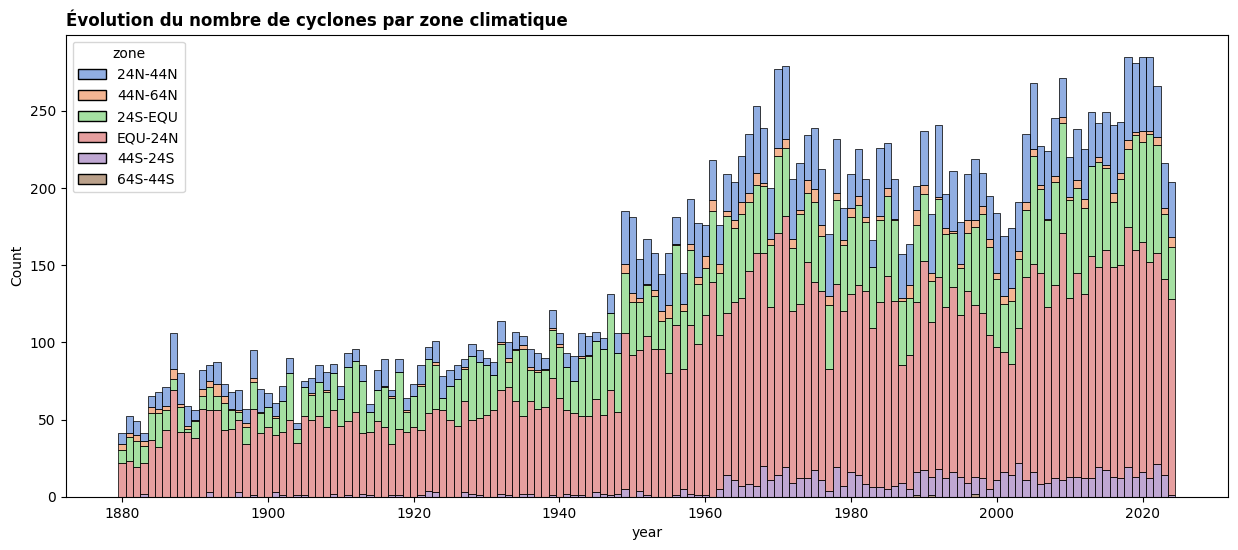

In [ ]:
#Création d'un dataframe pour compter le nombre de cyclone par an et par nature
cy_grp=cy_study.groupby(['year','NATURE','zone','hemisphere'])['SID'].count().reset_index()

plt.figure(figsize=(15, 6))
sns.histplot(data=cy_grp, x='year', weights='SID', hue='zone', multiple='stack',discrete=True, palette='muted', alpha=0.6)
plt.title("Évolution du nombre de cyclones par zone climatique", loc='left', fontweight='bold')
plt.show()



## Émissions de GES
[//]: # (-.- .tabset .tabset-pills)

Pour observer la distribution des émissions de GES, un dataframe où sont transposées en une seule colonne tous les types de gaz est créé pour faciliter la création des visualisations.

In [ ]:
ghg_transpose= owid_co2_clean.melt(
    id_vars=['year','continent'],
    value_vars=(['co2_including_luc', 'methane','nitrous_oxide']),
    var_name='GHG',
    value_name='emission',
    ignore_index=True
    )


print(ghg_transpose.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       2580 non-null   int64  
 1   continent  2580 non-null   object 
 2   GHG        2580 non-null   object 
 3   emission   2580 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 80.8+ KB
None


La distribution des émissions de GES par continent montre que l'Asie domine largement les émissions, suivie de l'Europe, l'Amérique du Nord, l'Afrique et l'Océanie. Celle par type de gaz révèlent le CO₂ est le principal contributeur aux émissions globales, très loin devant le méthane et le protoxyde d'azone. La régression linéaire des moyennes annuelles depuis 1880, illustre quant à elle une augmentation marquée et quasi exponentielle des émissions totales de GES au fil du temps.

Le détail par continent permet d'observer la trajectoire de chacun. L'Asie présente une croissance spectaculaire et continue. L'Europe montre un pic vers 1980 puis un déclin. L'Afrique et l'Amérique du Nord connaissent des augmentations régulières. L'Océanie et l'Amérique du Sud affichent des fluctuations avec tendance générale à la hausse.
Le détail des émissions par type de gaz permet d'observer que quelque soit le type de gaz, le classement par continent reste inchangé avec l'Asie comme le plus important émetteur. À noter que l'Europe a considérablement augmenté ses émissions en protoxyde d'azote, jusqu'à en être le plus important au cours des années 1950-1980. Ce pic est très certainement à mettre en relation avec l'intensification de l'agriculture, potentiellement limitées par l'introduction de politiques environnemntales.

Le graphique en barres empilées montre l'accumulation des trois types de GES depuis 1880. Le CO₂ constitue la majorité écrasante des émissions et sa croissance s'accélère particulièrement à partir de 1950. Le méthane et le protoxyde d'azote forment des portions mineures mais croissantes. L'augmentation globale est très nette après le milieu du XXe siècle.

### Distribution

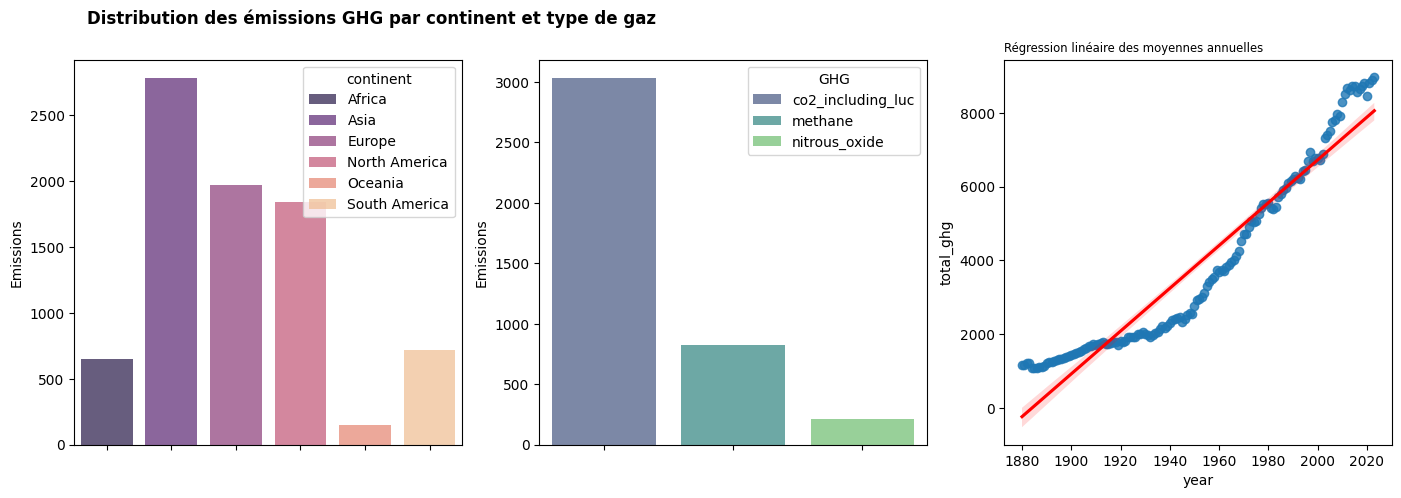

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(17, 5))
plt.suptitle("Distribution des émissions GHG par continent et type de gaz", fontweight='bold',x=0.3)
#par continent
sns.barplot(
    data=ghg_transpose, x="continent", y="emission", errorbar=None, hue="continent",
    palette='magma', ax=axes[0], alpha=0.7, legend='brief'
)
axes[0].set_xlabel('')
axes[0].set_ylabel('Emissions')
axes[0].set_xticklabels([])
sns.move_legend(axes[0], "upper right")

#par GHG
sns.barplot(
    data=ghg_transpose, x="GHG", y="emission", errorbar=None, hue="GHG",
    palette='viridis', ax=axes[1], alpha=0.7, legend='brief'
)
axes[1].set_xlabel('')
axes[1].set_ylabel('Emissions')
axes[1].set_xticklabels([])
sns.move_legend(axes[1], "upper right")


#Création d'un dataframe pour isoler et calculer les émissions moyennes de tous les continents
owid_total_gh_mean=owid_co2_clean.groupby('year')['total_ghg'].mean().reset_index()
sns.regplot(x='year', y='total_ghg', data=owid_total_gh_mean,
            line_kws={'color': 'red'}, ax=axes[2])
axes[2].set_title('Régression linéaire des moyennes annuelles', loc='left', fontsize='small')

plt.show()

### Évolution

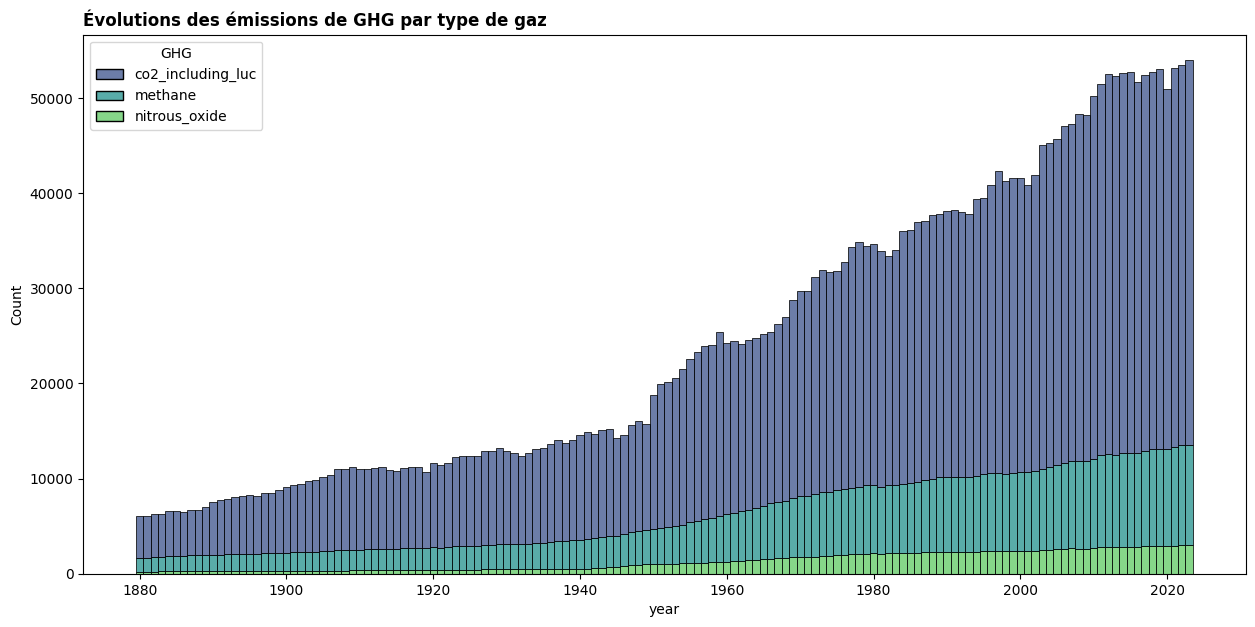

In [ ]:
plt.figure(figsize=(15, 7))
sns.histplot(data=ghg_transpose, x='year', weights='emission', hue='GHG', multiple='stack',discrete=True, palette='viridis')
plt.title("Évolutions des émissions de GHG par type de gaz", loc='left', fontweight='bold')
plt.show()

### Émission par continent

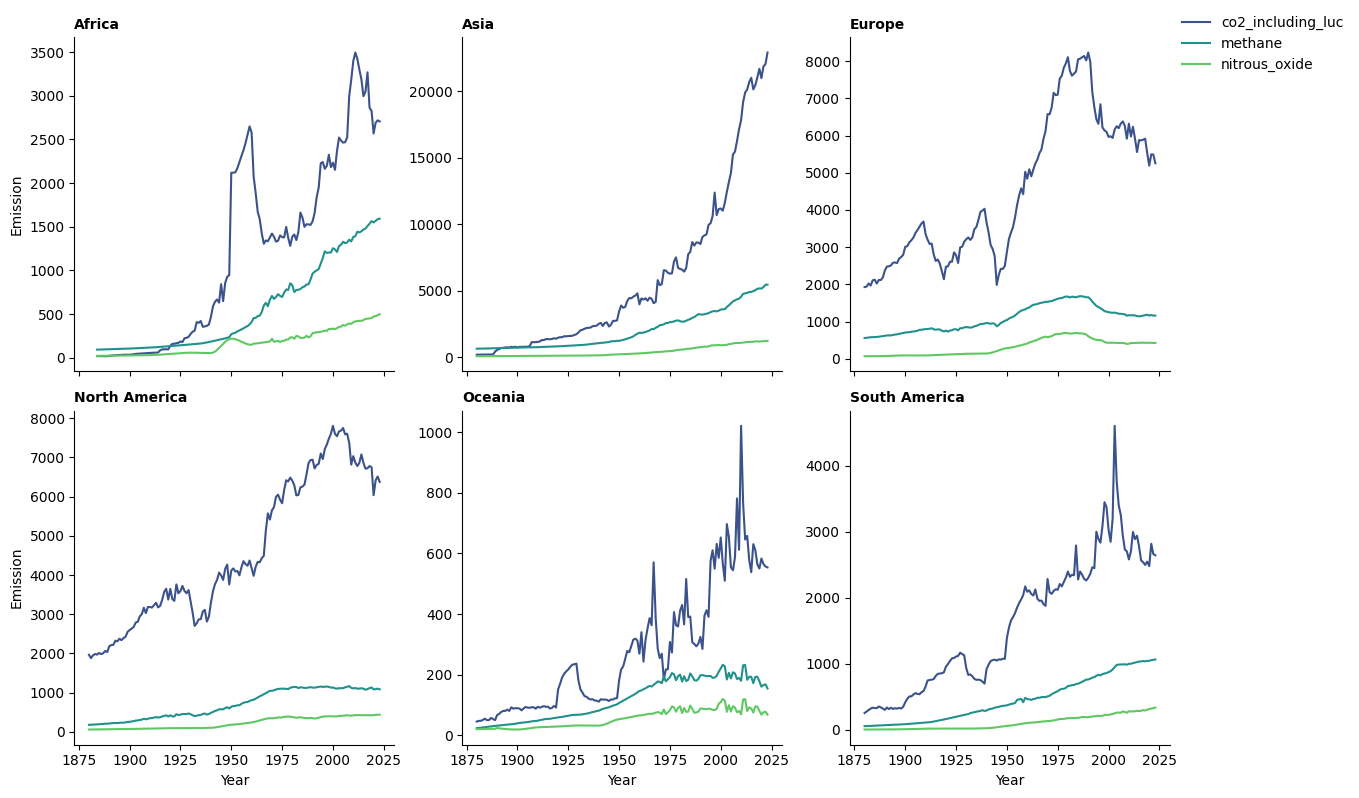

In [ ]:
g = sns.FacetGrid(ghg_transpose, col="continent", col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x='year', y='emission', hue='GHG', palette='viridis')
g.set_titles("")
g.set_titles(col_template="{col_name}", size=10, fontweight='bold',loc='left')
g.set_axis_labels('Year', 'Emission')
g.add_legend(bbox_to_anchor=(1, 1), loc='upper right')

plt.show()



### Émission  de gaz

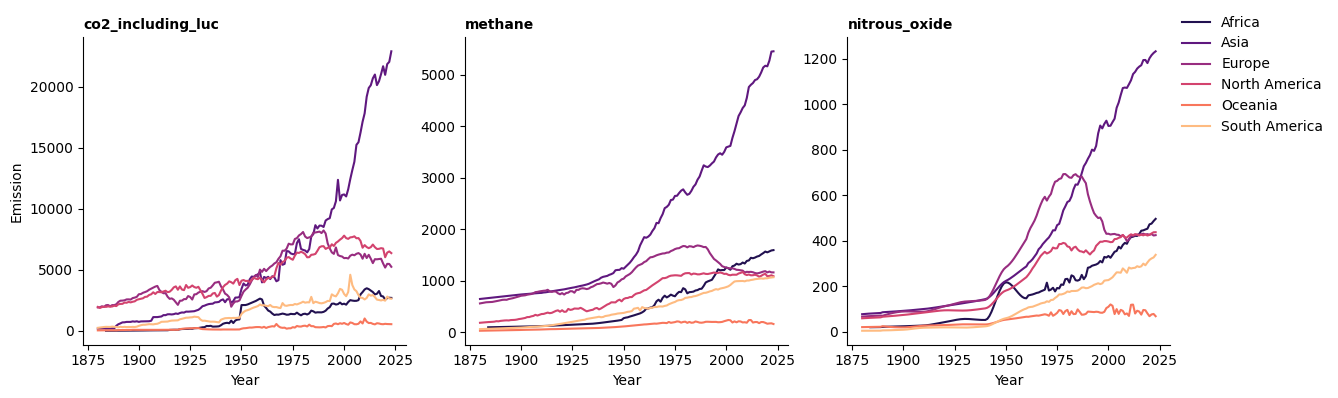

In [ ]:
g = sns.FacetGrid(ghg_transpose, col="GHG", height=4, sharey=False)
g.map_dataframe(sns.lineplot, x='year', y='emission', hue='continent', palette='magma')

g.set_axis_labels('Year', 'Emission')
g.set_titles("")
g.set_titles(col_template="{col_name}", size=10, fontweight='bold',loc='left')
g.add_legend(bbox_to_anchor=(1, 1), loc='upper right')
plt.show()


---
# CORRÉLATIONS

## Préparation des données

Afin de pouvoir mesurer la ou les corrélations existantes entre les anomalies de température, les émisssions de GES et la fréquence des cyclones, il est nécessaire de réunir les trois jeux de données dans un même dataframe.

Chacun des jeux de données présentant des données temporelles, mais également géographique, ces corrélations pourront être mesurées dans le temps ainsi qu'à l'échèlle des hémisphères. En effet, l'utilisation des zones climatiques définies par bandes lattitudinales n'est pas idoine pour le cas des continents qui recouvrent plusieurs zones.


### Concaténation des données GISTEMP
Les dataframes des hémisphère Nord et Sud vont être concaténés afin d'obtenir un ensemble global avant de le joindre aux données des émissions de GES. Seule la moyenne annuelle est retenue car les autres jeux de données traitent uniquement les années.


In [ ]:
#Ajout d'une colonne hemisphere pour faire la jointure avec les emissions de CO2
#nord
nh_loti_co2=nh_loti[['Year','J-D']].rename(columns={'Year': 'year'})
nh_loti_co2['hemisphere']='NHem'

#sud
sh_loti_co2=sh_loti[['Year','J-D']].rename(columns={'Year': 'year'})
sh_loti_co2['hemisphere']='SHem'

gbl_loti_co2=pd.concat([nh_loti_co2,sh_loti_co2],axis=0)
print(gbl_loti_co2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 288 entries, 1 to 144
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        288 non-null    int64  
 1   J-D         288 non-null    float64
 2   hemisphere  288 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 9.0+ KB
None


### Création du dataframe de corréaltion

In [ ]:
cy_hemis=cy_grp.groupby(['year','hemisphere'])['SID'].count().reset_index().rename(columns={'SID':'nb_cyclones'})
print('Dataframe du nombre de cyclones par hémisphère')
print('\n')
print(cy_hemis.info())

Dataframe du nombre de cyclones par hémisphère


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         290 non-null    int64 
 1   hemisphere   290 non-null    object
 2   nb_cyclones  290 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.9+ KB
None


In [ ]:
#pour confronter les données, il est nécessaire de les réunir dans un même dataframe
df_temp=pd.merge(co2_annual_mean, gbl_loti_co2, on =['year','hemisphere'], how='inner').rename(columns={'J-D':'temperature_anomaly'})
co2_temp=pd.merge(df_temp,cy_hemis, on=['year', 'hemisphere'], how='left')

print('Dataframe de corrélations')
print(co2_temp.info())

Dataframe de corrélations
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 286 non-null    int64  
 1   hemisphere           286 non-null    object 
 2   co2                  286 non-null    float64
 3   co2_including_luc    286 non-null    float64
 4   methane              286 non-null    float64
 5   nitrous_oxide        286 non-null    float64
 6   total_ghg            286 non-null    float64
 7   population           286 non-null    float64
 8   temperature_anomaly  286 non-null    float64
 9   nb_cyclones          286 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 22.5+ KB
None


In [ ]:
#Création de dataframe pour chaque hémisphère pour les visualisations
co2_temp_N=co2_temp[(co2_temp['hemisphere']=='NHem')].copy()
co2_temp_S=co2_temp[(co2_temp['hemisphere']=='SHem')].copy()

#Ajout d'une moyenne glissante de 5 ans pour les visualisations
window=5
co2_temp_N['temp_smooth'] = co2_temp_N['temperature_anomaly'].rolling(window).mean()
co2_temp_N['ghg_smooth']=co2_temp_N['total_ghg'].rolling(window).mean()
co2_temp_N['cy_smooth']=co2_temp_N['nb_cyclones'].rolling(window).mean()

co2_temp_S['temp_smooth'] = co2_temp_S['temperature_anomaly'].rolling(window).mean()
co2_temp_S['ghg_smooth']=co2_temp_S['total_ghg'].rolling(window).mean()
co2_temp_S['cy_smooth']=co2_temp_S['nb_cyclones'].rolling(window).mean()


## Graphiques
[//]: # (-.- .tabset .tabset-pills)

### Global

In [ ]:
#Création d'un dataframe avec les moyennes annuelles pour la visualisation
co2_temp_gbl=co2_temp.groupby(['year'])[['temperature_anomaly','total_ghg','nb_cyclones']].mean().reset_index()

print("Création d'un dataframe avec les moyennes annuelles pour la visualisation, ajout d'une moyenne glissante sur 5 ans")
window=5
co2_temp_gbl['temp_smooth'] = co2_temp_gbl['temperature_anomaly'].rolling(window).mean()
co2_temp_gbl['ghg_smooth']=co2_temp_gbl['total_ghg'].rolling(window).mean()
co2_temp_gbl['cy_smooth']=co2_temp_gbl['nb_cyclones'].rolling(window).mean()
print(co2_temp_gbl.info())

Création d'un dataframe avec les moyennes annuelles pour la visualisation, ajout d'une moyenne glissante sur 5 ans
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 143 non-null    int64  
 1   temperature_anomaly  143 non-null    float64
 2   total_ghg            143 non-null    float64
 3   nb_cyclones          143 non-null    float64
 4   temp_smooth          139 non-null    float64
 5   ghg_smooth           139 non-null    float64
 6   cy_smooth            139 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 7.9 KB
None


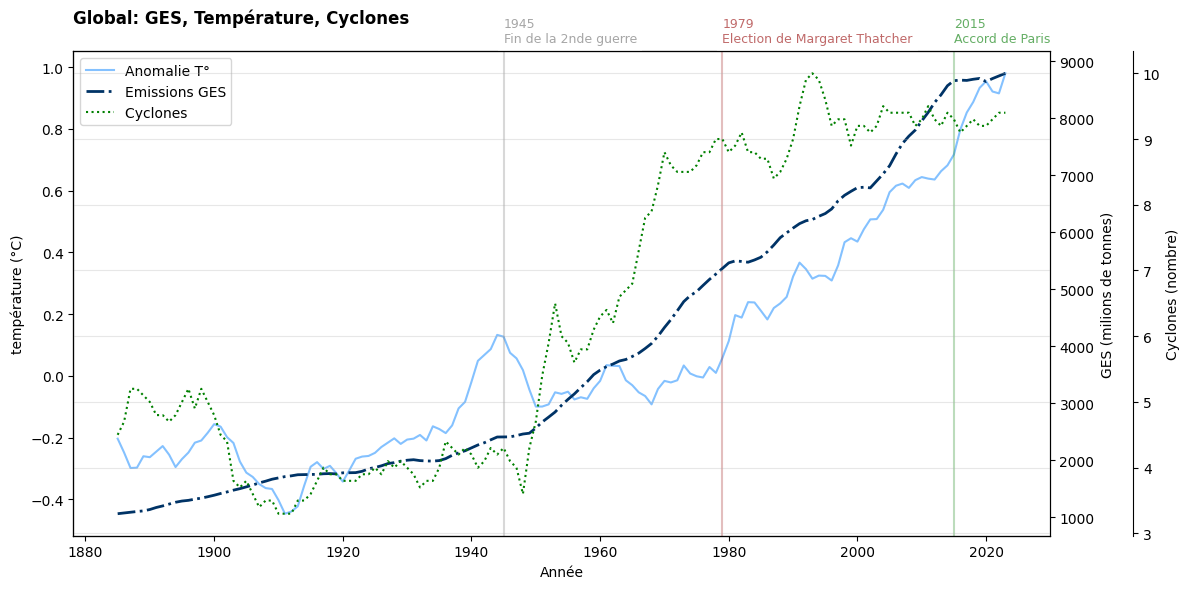

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))


#Courbe température
ax1.plot(co2_temp_gbl['year'], co2_temp_gbl['temp_smooth'],
         color='#3399ff',  label='Anomalie T°',alpha=0.6)
#Courbe co2
ax2 = ax1.twinx()
ax2.plot(co2_temp_gbl['year'], co2_temp_gbl['ghg_smooth'],
         color='#003366', ls = '-.', linewidth=2, label='Emissions GES')
#Courbe cyclones
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(co2_temp_gbl['year'], co2_temp_gbl['cy_smooth'],
         color='green', ls = ':', label='Cyclones ')



# Titre et légende
plt.title('Global: GES, Température, Cyclones',loc='left',fontweight='bold', pad=20)
ax1.set_xlabel('Année')
ax1.set_ylabel('température (°C)')
ax2.set_ylabel('GES (milions de tonnes)')
ax3.set_ylabel('Cyclones (nombre)')


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper left')


# événements
bbox=dict(facecolor='white', alpha=1, edgecolor='none')
ax1.axvline(x=1945, color='grey',  alpha=0.3)
ax1.text(1945, ax1.get_ylim()[-1]+0.03, '1945\nFin de la 2nde guerre',  color='grey', fontsize=9, alpha=0.7, bbox=bbox)
ax1.axvline(x=1979, color='brown',  alpha=0.3)
ax1.text(1979, ax1.get_ylim()[-1]+0.03, '1979\nElection de Margaret Thatcher',  color='brown', fontsize=9, alpha=0.7, bbox=bbox)
ax1.axvline(x=2015, color='forestgreen',  alpha=0.3)
ax1.text(2015, ax1.get_ylim()[-1]+0.03, '2015\nAccord de Paris',  color='forestgreen', fontsize=9, alpha=0.7,bbox=bbox)

plt.grid(alpha=0.3)
fig.tight_layout()
plt.show();

### Hémisphère Sud

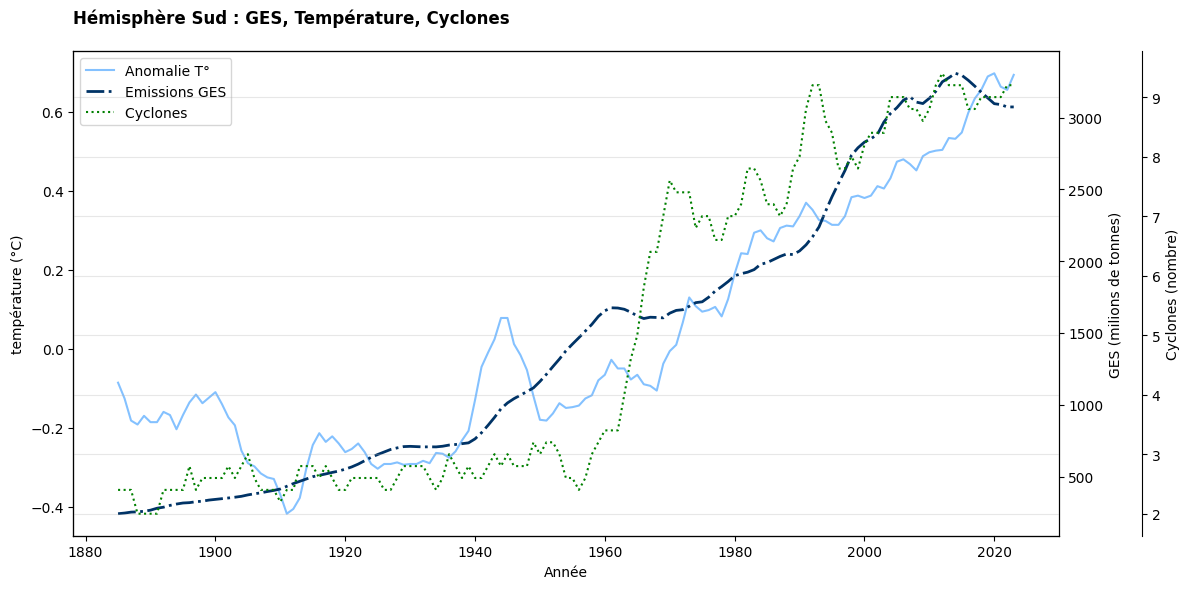

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))


#Courbe température
ax1.plot(co2_temp_S['year'], co2_temp_S['temp_smooth'],
         color='#3399ff',  label='Anomalie T°',alpha=0.6)
#Courbe co2
ax2 = ax1.twinx()
ax2.plot(co2_temp_S['year'], co2_temp_S['ghg_smooth'],
         color='#003366', ls = '-.', linewidth=2, label='Emissions GES')
#Courbe cyclones
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(co2_temp_S['year'], co2_temp_S['cy_smooth'],
         color='green', ls = ':', label='Cyclones ')



# Titre et légende
plt.title('Hémisphère Sud : GES, Température, Cyclones',loc='left',fontweight='bold', pad=20)
ax1.set_xlabel('Année')
ax1.set_ylabel('température (°C)')
ax2.set_ylabel('GES (milions de tonnes)')
ax3.set_ylabel('Cyclones (nombre)')


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper left')

plt.grid(alpha=0.3)
fig.tight_layout()
plt.show();


### Hémishpère Nord

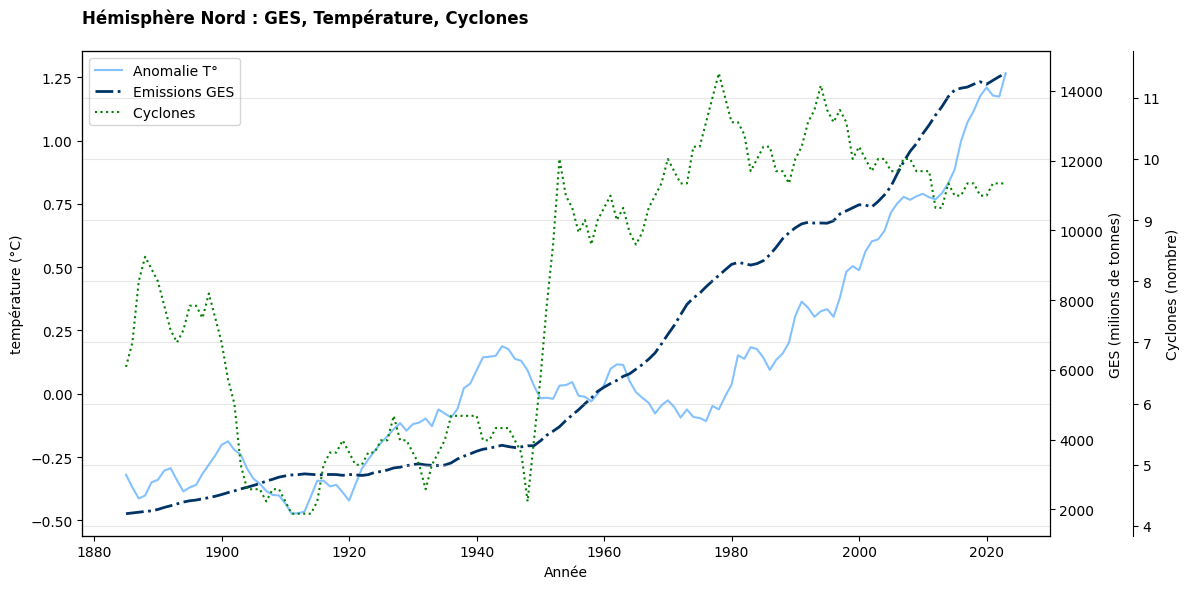

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

#Courbe température
ax1.plot(co2_temp_N['year'], co2_temp_N['temp_smooth'],
         color='#3399ff',  label='Anomalie T°',alpha=0.6)
#Courbe co2
ax2 = ax1.twinx()
ax2.plot(co2_temp_N['year'], co2_temp_N['ghg_smooth'],
         color='#003366', ls = '-.', linewidth=2, label='Emissions GES')
#Courbe cyclones
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(co2_temp_N['year'], co2_temp_N['cy_smooth'],
         color='green', ls = ':', label='Cyclones ')

# Titre et légende
plt.title('Hémisphère Nord : GES, Température, Cyclones',loc='left',fontweight='bold', pad=20)
ax1.set_xlabel('Année')
ax1.set_ylabel('température (°C)')
ax2.set_ylabel('GES (milions de tonnes)')
ax3.set_ylabel('Cyclones (nombre)')


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper left')

plt.grid(alpha=0.3)
fig.tight_layout()
plt.show();

## Corrélations

In [ ]:
#corrélation sur l'ensemble des données
corr_gbl=co2_temp[['temperature_anomaly','total_ghg', 'population','nb_cyclones']].corr().round(3)

#corrélation regroupée par hémisphère
corr_par_hemis = co2_temp.groupby('hemisphere')[['temperature_anomaly','total_ghg','population','nb_cyclones']].corr().round(3)

print('GLOBAL')
print('-'*15)
print(corr_gbl)
print('\n')
print('='*80)
print('PAR HEMISPHERE')
print('-'*15)
print(corr_par_hemis)

GLOBAL
---------------
                     temperature_anomaly  total_ghg  population  nb_cyclones
temperature_anomaly                1.000       0.68       0.661        0.603
total_ghg                          0.680       1.00       0.990        0.710
population                         0.661       0.99       1.000        0.725
nb_cyclones                        0.603       0.71       0.725        1.000


PAR HEMISPHERE
---------------
                                temperature_anomaly  total_ghg  population  \
hemisphere                                                                   
NHem       temperature_anomaly                1.000      0.887       0.906   
           total_ghg                          0.887      1.000       0.995   
           population                         0.906      0.995       1.000   
           nb_cyclones                        0.517      0.691       0.673   
SHem       temperature_anomaly                1.000      0.898       0.925   
           to

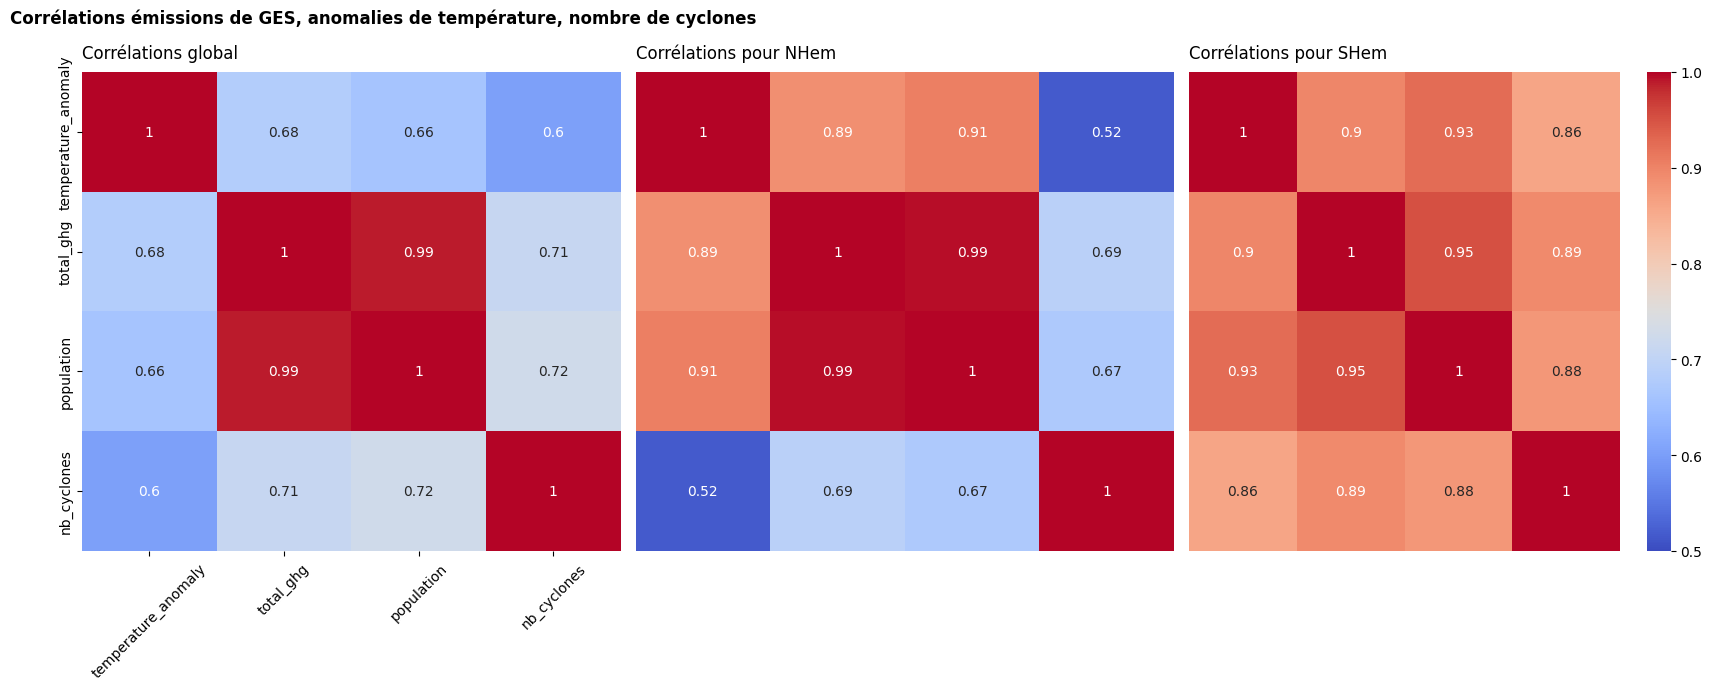

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(17, 7))
#Global
sns.heatmap(
    data=corr_gbl,
        annot=True,
    cmap='coolwarm',
    ax=axes[0],
    vmin=0.5, vmax=1,
    cbar=False
)
axes[0].set_title("Corrélations global", loc='left', pad=10)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

#NHem
sns.heatmap(
    data=corr_par_hemis.xs('NHem', level=0),
    annot=True,
    cmap='coolwarm',
    ax=axes[1],
    vmin=0.5, vmax=1,
    yticklabels=False,
    xticklabels=False,
    cbar=False
)
axes[1].set_title("Corrélations pour NHem", loc='left', pad=10)

# Heatmap pour SHem
sns.heatmap(
    data=corr_par_hemis.xs('SHem', level=0),
    annot=True,
    cmap='coolwarm',
    ax=axes[2],
    vmin=0.5, vmax=1,
    yticklabels=False,
    xticklabels=False
)
axes[2].set_title("Corrélations pour SHem", loc='left', pad=10)

plt.suptitle("Corrélations émissions de GES, anomalies de température, nombre de cyclones", fontweight='bold',x=0.2)
plt.tight_layout()
plt.show();

# CONCLUSIONS
Cette étude révèle une relation directe et croissante entre les émissions de gaz à effet de serre, l'augmentation des températures et l'intensité des cyclones. Cependant, cette relation présente une asymétrie marquée entre les deux hémisphères, l'hémisphère Sud montrant une sensibilité climatique nettement supérieure.
Principaux constats
1. Le lien GES-Température : une relation robuste et universelle
À l'échelle mondiale, les émissions totales de GES et les anomalies de température présentent une corrélation forte (r = 0.68), confirmant le lien causal bien établi par la science climatique. Cette corrélation s'intensifie même à l'hémisphère Nord (r = 0.89) et atteint son maximum au Sud (r = 0.90).
L'analyse temporelle montre que cette relation s'accélère dramatiquement après 1950, période marquant l'industrialisation intensive et la multiplication des sources d'émissions anthropiques. Le graphique global illustre un doublement de la corrélation apparente après les années 1980, reflet d'une amplification du forçage climatique.
2. Les cyclones : un indicateur complexe et différencié
Le nombre de cyclones détecté montre une corrélation modérée avec le GES à l'échelle mondiale (r = 0.71). Cependant, cette moyenne dissimule une réalité hémisphérique contrastée :

Hémisphère Nord : corrélation faible entre cyclones et température (r = 0.52) et GES (r = 0.69)
Hémisphère Sud : corrélation très forte avec la température (r = 0.86) et le GES (r = 0.89)

Cette disparité suggère que les facteurs climatiques régissant la génération et l'intensité des cyclones varient significativement selon la latitude. Le Sud, dominé par les océans et les régions tropicales, montre une sensibilité bien supérieure aux modifications thermiques globales.


L'étude révèle des corrélations, pas des causalités directes pour les cyclones. Cependant les connaissances scientifiques permettent d'identifier une causalité entre les émissions de gaz à effets de serres sur l'augmentation des températures, et la multiplcation des catastrophes naturelles. D'autres facteurs environnementaux (intensification des modes d'agriculture, déforestation..), mais également politiques (économie mondialisée, délocalisation d'activités industrielles), permettraient d'affiner ces constats.    

# BIBLIOGRAPHIE

Hansen, J., R. Ruedy, M. Sato, and K. Lo, 2010: Global surface temperature change. Rev. Geophys., 48, RG4004, doi:10.1029/2010RG000345
https://www.giss.nasa.gov/pubs/docs/2010/2010_Hansen_ha00510u.pdf

Lenssen, N., G.A. Schmidt, M. Hendrickson, P. Jacobs, M. Menne, and R. Ruedy, 2024: A GISTEMPv4 observational uncertainty ensemble. J. Geophys. Res. Atmos., 129, no. 17, e2023JD040179, doi:10.1029/2023JD040179.
https://essopenarchive.org/users/678317/articles/1115255-a-nasa-gistempv4-observational-uncertainty-ensemble

GISTEMP Team, 2025: GISS Surface Temperature Analysis (GISTEMP), version 4. NASA Goddard Institute for Space Studies. Dataset accessed 2025-08-10 at https://data.giss.nasa.gov/gistemp/.

Lenssen, N., G.A. Schmidt, M. Hendrickson, P. Jacobs, M. Menne, and R. Ruedy, 2024: A GISTEMPv4 observational uncertainty ensemble. J. Geophys. Res. Atmos., 129, no. 17, e2023JD040179, doi:10.1029/2023JD040179.  


Knapp, K. R., M. C. Kruk, D. H. Levinson, H. J. Diamond, and C. J. Neumann, 2010: The International Best Track Archive for Climate Stewardship (IBTrACS): Unifying tropical cyclone best track data. Bulletin of the American Meteorological Society, 91, 363-376. doi:10.1175/2009BAMS2755.1

Gahtan, J., K. R. Knapp, C. J. Schreck, H. J. Diamond, J. P. Kossin, M. C. Kruk, 2024: International Best Track Archive for Climate Stewardship (IBTrACS) Project, Version 4r01. ['ibtracs.ALL.list.v04r01.csv']. NOAA National Centers for Environmental Information. doi:10.25921/82ty-9e16 [2025-11-09].